#  DATA PREPROCESSING 

# QUESTION 1
Read in the provided ACW Data using the CSV library.

# Imported data from acw_user_data.csv using csv module and open in a read mode.Using for loop to iterate through the csv and append each row to output list. If the an error occurs, print error type. 


In [162]:
import csv

output = []
try :
    with open("./acw_user_data.csv", mode = 'r') as file_read:
        file_obtained = csv.reader(file_read,delimiter = ',')
        for line in file_obtained:
            output.append(line)
except Exception as error:
    print(f'an error of type {error} occured!')

In [3]:
output

[['Address Street',
  'Address City',
  'Address Postcode',
  'Age (Years)',
  'Distance Commuted to Work (miles)',
  'Employer Company',
  'Credit Card Start Date',
  'Credit Card Expiry Date',
  'Credit Card Number',
  'Credit Card CVV',
  'Dependants',
  'First Name',
  'Bank IBAN',
  'Last Name',
  'Marital Status',
  'Yearly Pension (GBP)',
  'Retired',
  'Yearly Salary (GBP)',
  'Sex',
  'Vehicle Make',
  'Vehicle Model',
  'Vehicle Year',
  'Vehicle Type'],
 ['70 Lydia isle',
  'Lake Conor',
  'S71 7XZ',
  '89',
  '0',
  'N/A',
  '08/18',
  '11/27',
  '676373692463',
  '875',
  '3',
  'Kieran',
  'GB62PQKB71416034141571',
  'Wilson',
  'married or civil partner',
  '7257',
  'True',
  '72838',
  'Male',
  'Hyundai',
  'Bonneville',
  '2009',
  'Pickup'],
 ['00 Wheeler wells',
  'Chapmanton',
  'L2 7BT',
  '46',
  '13.72',
  'Begum-Williams',
  '08/12',
  '11/26',
  '4529436854129855',
  '583',
  '1',
  'Jonathan',
  'GB37UMCO54540228728019',
  'Thomas',
  'married or civil partn

# QUESTION 2

As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably: 

a. Vehicle - consists of make, model, year, and type

b. Credit Card - consists of start date, end date, number, security code, and IBAN.

c. Address - consists of the main address, city, and postcode.

 # To enumerate the heading of the 22 columns of the CSV file.
# The enumerate function returns a tuple below with the numbers representing index and the heading of each column representing value.


In [163]:
heading = output[0]
for index,value in enumerate(heading):
    print(f'{index} {value}')

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (GBP)
16 Retired
17 Yearly Salary (GBP)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


# Defined the conversion function which converts the document from a flat file to a rich and nested file.  Using the function to loop through the individual data and producing a list of dictionaries  and stored in a dictionary called pop.



In [164]:
def conversion(document):
    rich_document = []

        
    for line,value in enumerate(document):
        if line == 0:
            continue
        pop = {}
        
        AddressStreet = {}
        CreditCard = {}
        Vehicle = {}
        AddressStreet["Address Street"] = value[0]
        AddressStreet["Address City"] = value[1]
        AddressStreet["Address Postcode"] = value[2]

        pop["Age"] = int(value[3])
        pop["Distance Commuted to Work"] = float(value[4])
        pop["Employer Company"] = value[5]
        CreditCard["Credit Card Start Date"] = value[6]
        CreditCard["Credit Card Expiry Date"] = value[7]
        CreditCard["Crredit Card Number"] = value[8]
        CreditCard["Credit Card CVV"] = value[9]
    
        if value[10] == '':
            pop["Dependants"] = 0
        else:
            pop["Dependants"] = value[10]
        
        pop["First Name"] = value[11]
        pop["Bank IBAN"] = value[12]
        pop["Last Name"] = value[13]
        pop["Marital Status"] = value[14]
        pop["Yearly Pension"] = float(value[15])
        pop["Retired"] = value[16]
        pop["Yearly Salary"] = value[17]
        pop["Sex"] = value[18]
        Vehicle["Vehicle Make"] = value[19]
        Vehicle["Vehicle Model"] = value[20]
        Vehicle["Vehicle Year"] = value[21]
        Vehicle["Vehicle Type"] = value[22]
        pop['Vehicle'] = Vehicle
        pop['CreditCard'] = CreditCard
        pop['Address'] = AddressStreet
        
        rich_document.append(pop)
    return rich_document
        

In [6]:
outcome = conversion(output)
outcome

[{'Age': 89,
  'Distance Commuted to Work': 0.0,
  'Employer Company': 'N/A',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 7257.0,
  'Retired': 'True',
  'Yearly Salary': '72838',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'CreditCard': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Crredit Card Number': '676373692463',
   'Credit Card CVV': '875'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'}},
 {'Age': 46,
  'Distance Commuted to Work': 13.72,
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',


# QUESTION 3
 The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered. 

Print a list where all such error corrections take place.

# The blocks of code loops through variable (output), checking if the index [10] is an empty row. If empty row, append the line number of the empty row. This is to identify the rows without entries.

In [165]:
empty_rows = []
for line,value in enumerate(output):
    if line == 0:
            continue
    if value[10] == '':
        empty_rows.append(line)
print(empty_rows)

[22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


# QUESTION 4
Write all records to a processed.json file in the JSON data format. This should be a
list of dictionaries, where each index of the list is a dictionary representing a singular 
person.

# Used the json module to write (output) into a processed json file with indentation chosen to be 2  to enable easy reading.  

In [166]:
import json

with open("processed.json", "w") as fp:
    json.dump(outcome, fp, indent = 2)
    fp.close()

In [9]:
outcome

[{'Age': 89,
  'Distance Commuted to Work': 0.0,
  'Employer Company': 'N/A',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 7257.0,
  'Retired': 'True',
  'Yearly Salary': '72838',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'CreditCard': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Crredit Card Number': '676373692463',
   'Credit Card CVV': '875'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'}},
 {'Age': 46,
  'Distance Commuted to Work': 13.72,
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',


# QUESTION 5
You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the 
CSV), and all employed customers respectively (as indicated by the employer field in 
the CSV) and be in the JSON data format. 

# QUESTION 5A

# Defined Retired_group function, which checks the rows of the data and returns a boolean True , if the Retired key is True, from the next blocks of code using list comprehension, create the Retired list.

In [10]:
def retired_group(row):
    if row["Retired"] == 'True':
        return True
    else:
        return False



In [11]:
retired = [entry for entry in outcome if retired_group(entry) == True ]
retired

[{'Age': 89,
  'Distance Commuted to Work': 0.0,
  'Employer Company': 'N/A',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 7257.0,
  'Retired': 'True',
  'Yearly Salary': '72838',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'CreditCard': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Crredit Card Number': '676373692463',
   'Credit Card CVV': '875'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'}},
 {'Age': 67,
  'Distance Commuted to Work': 0.0,
  'Employer Company': 'N/A',
  'Dependants': '1',
  'First Name': 'Clive',
  'Bank IBAN': 'GB04VSAZ69128049616822',
  'Last Name': 'Evans',
  'Marital Status': 'single',
  'Yearly Pension': 28075.0,
  'Ret

# Defined Retired_group function, which checks the rows of the data and returns a boolean False , if the Retired key is False. From the code below using list comprehension, create the employed list.

# QUESTION 5B

In [12]:
employed = [entry for entry in outcome if retired_group(entry) == False ]
employed

[{'Age': 46,
  'Distance Commuted to Work': 13.72,
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 0.0,
  'Retired': 'False',
  'Yearly Salary': '54016',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': '1996',
   'Vehicle Type': 'Coupe'},
  'CreditCard': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Crredit Card Number': '4529436854129855',
   'Credit Card CVV': '583'},
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'}},
 {'Age': 22,
  'Distance Commuted to Work': 16.02,
  'Employer Company': 'Hill-Wright',
  'Dependants': '1',
  'First Name': 'Antony',
  'Bank IBAN': 'GB40CVUE84011545859591',
  'Last Name': 'Jones',
  'Marital Status': 'married or civil partne

# Used the json module to write the retired json with indentation as 2 to enable easy reading.

In [160]:
with open("retired.json", "w") as fp:
    json.dump(retired, fp, indent = 2)
    fp.close()

# Used the json module to write the employed json with indentation as 2 to enable easy reading.

In [161]:
with open("employed.json", "w") as fp:
    json.dump(employed, fp, indent = 2)
    fp.close()

# QUESTION 6
The client states that there may be some issues with credit card entries. Any 
customers that have more than 10 years between their start and end date need 
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you 
write a function to help perform this, which accepts a single row from the CSV data, 
and outputs whether the row should be flagged. This can then be used when 
determining whether to write the current person to the remove_ccard file. 

# Defined the function card, which extracts the credit card details and calculates the omission using abs function. If the omission is greater than 10years return boolean True, if less than 10 years return False. This is to check if the Credit cards are still active.

In [169]:
def card(details):
    credit_start = int(details["CreditCard"]["Credit Card Start Date"].split("/")[1])
    credit_end = int(details["CreditCard"]["Credit Card Expiry Date"].split("/")[1])
    omission = abs(credit_end - credit_start)
    if omission > 10:
        return True
    else:
        return False

# Used the card details from the above block of codes, to loop through the outcome to identify credit card details valid for 10 years and add a new key-value called flag. 

In [170]:
flag_output = []

for details in outcome:
    details["flag"] = card(details)
    if details["flag"] == True:
        flag_output.append(details)
flag_output

[{'Age': 46,
  'Distance Commuted to Work': 13.72,
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 0.0,
  'Retired': 'False',
  'Yearly Salary': '54016',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': '1996',
   'Vehicle Type': 'Coupe'},
  'CreditCard': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Crredit Card Number': '4529436854129855',
   'Credit Card CVV': '583'},
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'flag': True},
 {'Age': 43,
  'Distance Commuted to Work': 20.05,
  'Employer Company': 'Clark Group',
  'Dependants': '3',
  'First Name': 'Julian',
  'Bank IBAN': 'GB92PWOB18937027850061',
  'Last Name': 'Potter',
  'Marital Status': 'single

# Used the json module to write the remove_ccard json with indentation as 2 to enable easy reading.

In [102]:
with open("remove_ccard.json", "w") as fp:
    json.dump(flag_output, fp, indent = 2)
    fp.close()

# QUESTION 7
You have been tasked with calculating some additional metrics which will be used for 
ranking customers. You should create a new data attribute for our customers called 
“Salary-Commute”. Reading in from processed.json: 
a. Add, and calculate appropriately, this new attribute. It should represent the 
Salary that a customer earns, per mile of their commute. 

i. Note: If a person travels 1 or fewer commute miles, then their salarycommute would be just their salary. 
    
b. Sort these records by that new metric, in ascending order. 

c. Store the output file out as a JSON format, for a commute.json file.

# Opened and loaded data from processed json, to calculate the salary commute and round up the result to 2 decimal plcaes. 

# QUESTION 7A

In [43]:
rp = open("processed.json")  
processed = json.load(rp)

salary_commute = []      

for line in processed:
    distance = line["Distance Commuted to Work"]
    salary = line["Yearly Salary"]
    if distance <= 1:
        line["Salary-Commute"] = float(salary)
    else:
        line["Salary-Commute"] = round(float(salary) / distance,2)
    salary_commute.append(line)
    
salary_commute  

[{'Age': 89,
  'Distance Commuted to Work': 0.0,
  'Employer Company': 'N/A',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension': 7257.0,
  'Retired': 'True',
  'Yearly Salary': '72838',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': '2009',
   'Vehicle Type': 'Pickup'},
  'CreditCard': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Crredit Card Number': '676373692463',
   'Credit Card CVV': '875'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Salary-Commute': 72838.0},
 {'Age': 46,
  'Distance Commuted to Work': 13.72,
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status':

# QUESTION 7B

# Used Sort function to arrange the data in "Salary-Commute" in ascending order.

In [51]:
sorted_data = sorted(salary_commute, key=lambda x: x["Salary-Commute"])
sorted_data

[{'Age': 52,
  'Distance Commuted to Work': 5.52,
  'Employer Company': 'Smith, Birch and Burke',
  'Dependants': '2',
  'First Name': 'Graeme',
  'Bank IBAN': 'GB09ELJH35362236053720',
  'Last Name': 'Jackson',
  'Marital Status': 'single',
  'Yearly Pension': 0.0,
  'Retired': 'False',
  'Yearly Salary': '17046',
  'Sex': 'Male',
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': '2011',
   'Vehicle Type': 'SUV'},
  'CreditCard': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Crredit Card Number': '4713424668774153',
   'Credit Card CVV': '3053'},
  'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Salary-Commute': 3088.04},
 {'Age': 30,
  'Distance Commuted to Work': 5.64,
  'Employer Company': 'Wood-Davies',
  'Dependants': '1',
  'First Name': 'Janet',
  'Bank IBAN': 'GB47KCJL06712308674300',
  'Last Name': 'Quinn',
  'Marita

# QUESTION 7C

#  Used the json module to write the commute json with indentation as 2 to enable easy reading.

In [103]:
with open("commute.json", "w") as fp:
    json.dump(sorted_data, fp, indent = 2)
    fp.close()

# DATA VISUALISATION SECTION

# QUESTION 1

Using Pandas and Seaborn 
Your client wishes to understand the data they have on their customers a bit more by use of 
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
the assignment.

Obtain the Data Series for Salary, and Age, and calculate the following: 

a. Mean Salary 

b. Median Age

# Imported seaborn, pandas and matplotlib data visualization and analysis libraries, with matplotlib inline to enable data visualization on output cells in jupyter notebook.

In [89]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Used pandas libraries, to read csv file acw_user_data.

In [90]:
user_data = pd.read_csv("acw_user_data.csv")

In [71]:
user_data

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (miles)          Employer Company  \
0                                 0.00                       NaN   
1                                13.72            Begum-Williams   
2                                16.02               Hill-Wright   
3                                19.35                 Green LLC   
4                                 5.94  Hill, Evans and Harrison   
..                                 ...                       ...   
995                              18.44             Phillips-Pope   
996                              19.61                Hughes LLC   
997                               6.66              Bailey Group   
998                              18.13              Foster-Price   
999                               0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                   7257    True               72838    Male       Hyundai   
1                      0   False               54016    Male        Nissan   
2                      0   False               68049    Male           GMC   
3                      0   False               91337    Male         Scion   
4                      0   False               18446  Female         Buick   
..                   ...     ...                 ...     ...           ...  

# Used  column attribute to print columns of user_data

In [172]:
user_data.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

# Used describe method to outline descriptive characteristics of user_data 

In [173]:
user_data.describe()

Age (Years)  Distance Commuted to Work (miles)  Credit Card Number  \
count  1000.000000                        1000.000000        1.000000e+03   
mean     54.302000                          10.457770        4.188020e+17   
std      21.319646                           6.951997        1.304208e+18   
min      18.000000                           0.000000        6.041600e+10   
25%      36.000000                           5.637500        3.857314e+13   
50%      54.000000                          12.170000        3.510666e+15   
75%      72.000000                          16.262500        4.635909e+15   
max      91.000000                          20.340000        4.967327e+18   

       Credit Card CVV  Dependants  Yearly Pension (GBP)  Yearly Salary (GBP)  \
count      1000.000000  981.000000           1000.000000          1000.000000   
mean        932.482000    2.135576           5875.413000         57814.078000   
std        1626.125269    0.977799          10986.507761         23270.417139   
min           2.000000    1.000000              0.000000         17046.000000   
25%         277.000000    1.000000              0.000000         39089.750000   
50%         559.500000    2.000000              0.000000         57518.000000   
75%         833.250000    3.000000              0.000000         77211.500000   
max        9977.000000    5.000000          46117.000000         98915.000000   

       Vehicle Year  
count   1000.000000  
mean    2006.927000  
std        8.211035  
min     1992.000000  
25%     2000.000000  
50%     2008.000000  
75%     2014.000000  
max     2020.000000

# QUESTION 1A

# Calculated the variable mean_salary using mean method.

In [93]:
mean_salary = user_data["Yearly Salary (GBP)"].mean()

In [94]:
mean_salary

57814.078

# QUESTION 1B

# Calculated the variable median_age using the median method

In [95]:
median_age = user_data["Age (Years)"].median()

In [96]:
median_age

54.0

# QUESTION 2
Perform univariate plots of the following data attributes: 

a. Age, calculating how many bins would be required for a bin_width of 5. 

b. Dependents, fixing data errors with seaborn itself. 

c. Age (of default bins), conditioned on Marital Status 

# QUESTION 2A

# Calculated max_age, mini_age, age_difference and numbins. Using the outputs to create a histogram showing distribution of employees age.

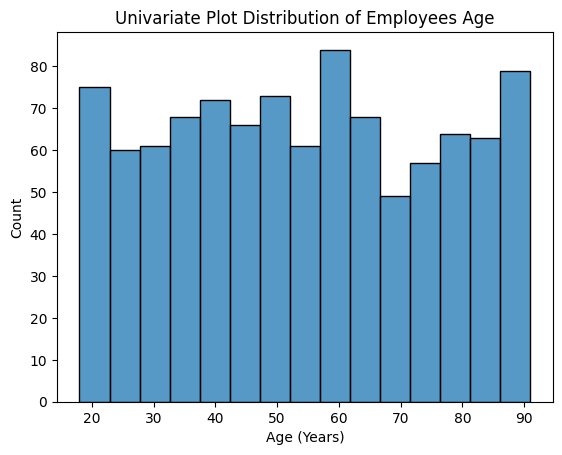

In [189]:
max_age =  user_data["Age (Years)"].max()    

mini_age =  user_data["Age (Years)"].min()   

age_difference = max_age - mini_age    

numbins = int(round(difference / 5,0))              

numbins

age_plt = sns.histplot(data = user_data, x = "Age (Years)", bins=numbins)
plt.title("Univariate Plot Distribution of Employees Age");   

# QUESTION 2B

# Used seaborn function to count the employes dependants and plot the distribution

Text(0.5, 1.0, 'Univariate Plot Distribution of Employees Dependants')

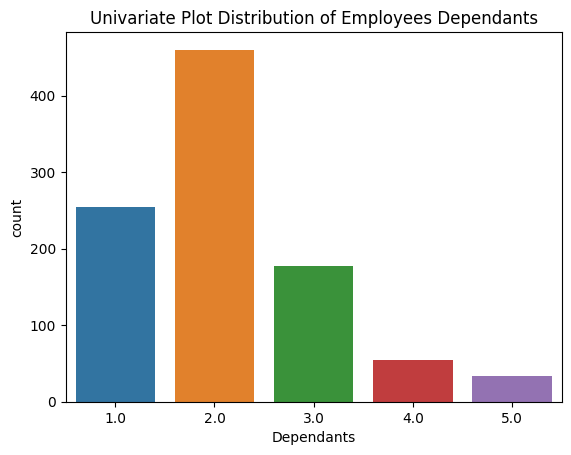

In [176]:
depandant_plt=sns.countplot(data = user_data, x = "Dependants") 
plt.title("Univariate Plot Distribution of Employees Dependants")

# QUESTION 2C

# Used pandas to create a histogram showing distribution of ages and marital status of employees. 

Text(0.5, 1.0, 'Univariate Plot Distribution of Employees Age respect to their Marital Status')

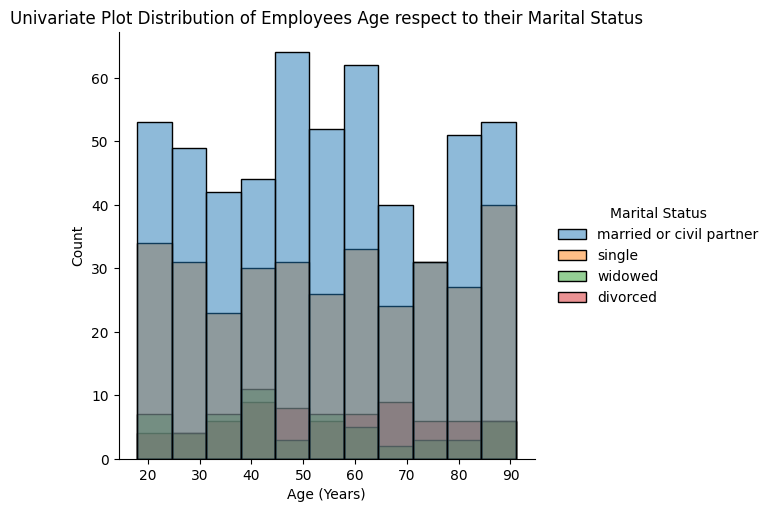

In [175]:
age_maritalstatus_plt = sns.displot( x = "Age (Years)",data = user_data, hue = "Marital Status")
plt.title("Univariate Plot Distribution of Employees Age respect to their Marital Status")

# QUESTION 3
Perform multivariate plots with the following data attributes: 
    
a. Commuted distance against salary. 

b. Age against Salary 

c. Age against Salary conditioned by Dependants

# QUESTION 3A

# Used pandas to create a scattered plot of distance to work and yearly salary.

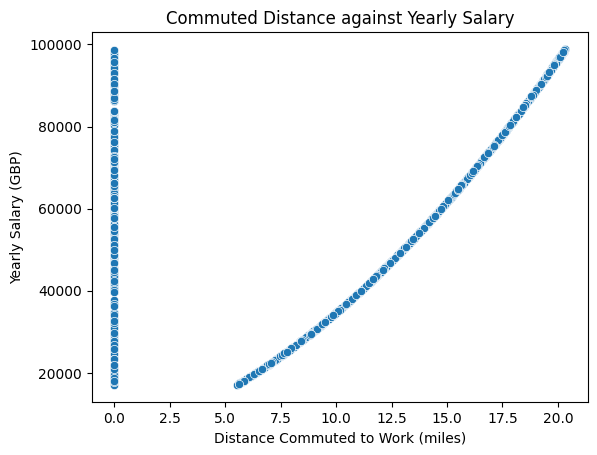

In [182]:
commute_distance_plt = sns.scatterplot(data = user_data, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
plt.title("Commuted Distance against Yearly Salary"); 

# QUESTION 3B

# Used Pandas to create scattered plot showing relationship between ages of employees and their yearly salary.

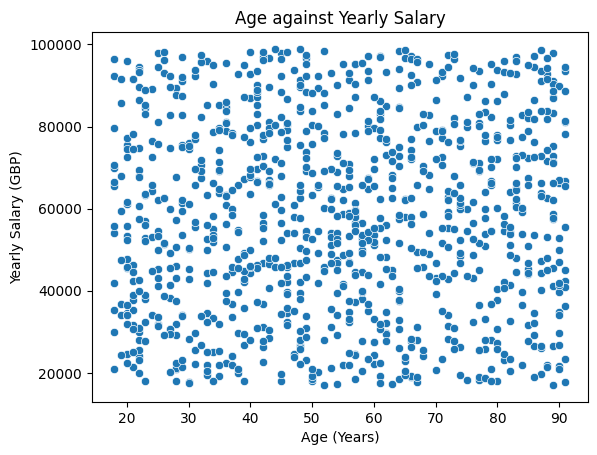

In [187]:
age_salary_plt = sns.scatterplot(data = user_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
plt.title("Age against Yearly Salary"); 

# QUESTION 3C

# Used Pandas to create scattered plot showing age, yearly salary and number of dependants the employees have. 

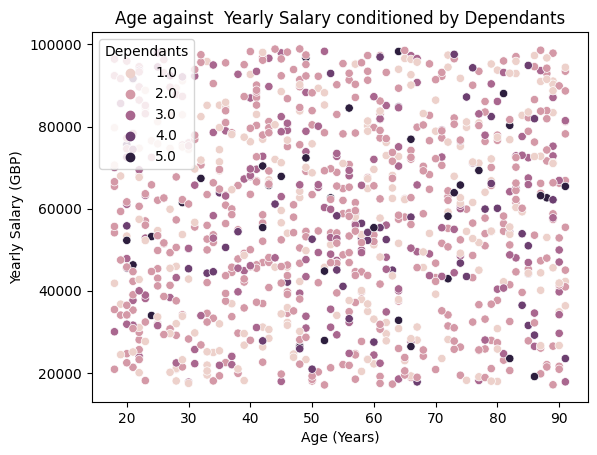

In [135]:
age_salary_dependants = sns.scatterplot(data = user_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = "Dependants")
plt.title("Age against  Yearly Salary conditioned by Dependants");

# QUESTION 4
Your client would like the ability to save the plots which you have produced. Provide 
a Notebook cell which can do this. 

# Used dictionaries to save Matplotlib plots into different picture files.

In [155]:
plot_names = {age_plt:'./age_plot.png' , depandant_plt:'./dep_plot.png', age_maritalstatus_plt:'./age_mart_plot.png', 
              commute_distance_plt:'./comm_dis_plot.png', age_salary_plt:'./age_sal_plot.png', 
              age_salary_dependants:'./age_sal_dep_plot.png'}


for plts in plot_names:
    
    plts.figure.savefig(plot_names[plts])
    